In [ ]:
# Sentiment Analysis

In [1]:
# Downloading some useful nltk libraries

import nltk
nltk.download('punkt')
nltk.download('stopwords') # to tokenize words and remove words <3

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Importing Libraries

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import re
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('koreanTV_comment.csv')
dataset.head()

,Title,Review Title,User Rating,Content,Helpfulness Vote
0,Hellbound,Did I watch the same show?,8/10,I felt compelled to write a review based on th...,37 out of 41
1,Hellbound,what i think...,8/10,"This show is amazing, I think people are hell-...",19 out of 20
2,Hellbound,Overwhelming technical shortcomings with ingen...,9/10,"When I saw the CG monsters in the trailer, I t...",39 out of 44
3,Hellbound,Slow start but oh my god!,8/10,"Firstly, people who have posted there reviews ...",58 out of 72
4,Hellbound,A gripping series,9/10,I started just thinking of watching one episod...,105 out of 138


In [4]:
dataset.info()   # getting info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8275 entries, 0 to 8274
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             8275 non-null   object
 1   Review Title      8275 non-null   object
 2   User Rating       8275 non-null   object
 3   Content           8275 non-null   object
 4   Helpfulness Vote  8275 non-null   object
dtypes: object(5)
memory usage: 323.4+ KB


In [5]:
# finding null values in dataset

dataset.isnull().sum()

Title               0
Review Title        0
User Rating         0
Content             0
Helpfulness Vote    0
dtype: int64

In [6]:
# finding columns 

dataset.columns

Index(['Title', 'Review Title', 'User Rating', 'Content', 'Helpfulness Vote'], dtype='object')

In [7]:
# removing all unwanted columns from dataset
# returns only text column in the dataset so we can analize sentiments
# that dataset will be named as newdataset

newdataset = dataset.drop(['Title','Review Title','User Rating','Helpfulness Vote'],axis=1)
newdataset.head()

,Content
0,I felt compelled to write a review based on th...
1,"This show is amazing, I think people are hell-..."
2,"When I saw the CG monsters in the trailer, I t..."
3,"Firstly, people who have posted there reviews ..."
4,I started just thinking of watching one episod...


In [8]:
# verifying the newdataset has any null values or not

newdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8275 entries, 0 to 8274
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  8275 non-null   object
dtypes: object(1)
memory usage: 64.8+ KB


In [9]:
# converting data into words so that sentiment analysis can be done

# textprocessing

def textprocessing(text):
  text = text.lower()                                                           # converting all uppercase letters to lowercase
  text = re.sub(r"https\S+|www\S+https\S+"," ",text,flags=re.MULTILINE)         # removing all links from dataset
  text = re.sub(r'\@w+|\#'," ",text)                                            # removing # and @ symbols from dataset
  text = re.sub(r'[^\w\s]'," ",text)                                            # removing other symbols like ^
  text_tokens = word_tokenize(text)                                             # breaking data into single words
  filtered_text = [w for w in text_tokens if not w in stop_words]               # filtering words <3
  return " ".join(filtered_text)                                                # joining the filtered text

In [10]:
newdataset.text = dataset['Content'].apply(textprocessing)   # applying the textprocessing method to dataset

In [11]:
newdataset = newdataset.drop_duplicates('Content')           # removing same text from the datset

In [12]:
# stemming the words
# words of same kinds will be grouped ex: liked,like,liking etc

stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [13]:
newdataset['Content'] = newdataset['Content'].apply(lambda x : stemming(x))  # applying the stemming method to newdataset

In [14]:
newdataset.head()  # viewing newdataset

,Content
0,I felt compelled to write a review based on th...
1,"This show is amazing, I think people are hell-..."
2,"When I saw the CG monsters in the trailer, I t..."
3,"Firstly, people who have posted there reviews ..."
4,I started just thinking of watching one episod...


In [15]:
# info about dataset after removing duplicate data

newdataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8270 entries, 0 to 8274
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  8270 non-null   object
dtypes: object(1)
memory usage: 129.2+ KB


In [16]:
# getting polarity of the text

def polarity(text):
  return TextBlob(text).sentiment.polarity

In [17]:
# getting subjectivity of the text

def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [18]:
# creating a polarity column for the text
# creating a subjectivity column for the text

newdataset['polarity'] = newdataset['Content'].apply(polarity)
newdataset['subjectivity'] = newdataset['Content'].apply(subjectivity)

In [19]:
# viewing updated dataset

newdataset.head()

,Content,polarity,subjectivity
0,I felt compelled to write a review based on th...,0.209333,0.497167
1,"This show is amazing, I think people are hell-...",0.192000,0.598000
2,"When I saw the CG monsters in the trailer, I t...",0.126667,0.416111
3,"Firstly, people who have posted there reviews ...",0.221429,0.348810
4,I started just thinking of watching one episod...,0.200000,0.680000


In [20]:
# caluclating sentiment of the data using polarity values

def sentiment(label):
  if label < 0 :
    return "Negative"
  elif label == 0 :
    return "Neutral"
  else :
    return "Positive"

In [21]:
newdataset['Sentiment'] = newdataset['polarity'].apply(sentiment)     # applying Sentiment column to newdataset which analizes polarity values of the text 

In [22]:
# viewing the dataset

newdataset.head()

,Content,polarity,subjectivity,Sentiment
0,I felt compelled to write a review based on th...,0.209333,0.497167,Positive
1,"This show is amazing, I think people are hell-...",0.192000,0.598000,Positive
2,"When I saw the CG monsters in the trailer, I t...",0.126667,0.416111,Positive
3,"Firstly, people who have posted there reviews ...",0.221429,0.348810,Positive
4,I started just thinking of watching one episod...,0.200000,0.680000,Positive


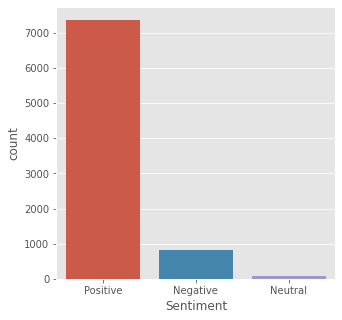

In [23]:
# plotting the Sentiments in a bargraph

pic = plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment',data=newdataset)

In [24]:
# plotting polarity and subjectivity

'''plt.figure(figsize=(5,5))

for i in range(0,newdataset.shape[0]):
  plt.scatter(newdataset['polarity'][i],newdataset['subjectivity'][i],color = 'blue')

plt.tile("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()'''

'plt.figure(figsize=(5,5))\n\nfor i in range(0,newdataset.shape[0]):\n  plt.scatter(newdataset[\'polarity\'][i],newdataset[\'subjectivity\'][i],color = \'blue\')\n\nplt.tile("Sentiment Analysis")\nplt.xlabel("Polarity")\nplt.ylabel("Subjectivity")\nplt.show()'

In [25]:
# viewing positive tweets

positive_tweets = newdataset[newdataset.Sentiment == "Positive"]
positive_tweets = positive_tweets.sort_values(['polarity'],ascending=False)
positive_tweets.head()

,Content,polarity,subjectivity,Sentiment
7493,"Best thriller series in kdrama,if u r thinking...",1.0,0.300,Positive
363,Best k drama\nWouldn't change a thing about my...,1.0,0.300,Positive
2690,The best Korean dorama 10/10+\nMUST WATCH DORA...,1.0,0.300,Positive
1274,The way the storyline interlocks with each cha...,1.0,0.900,Positive
6597,The actor and actress chemistry in this drama ...,1.0,0.675,Positive


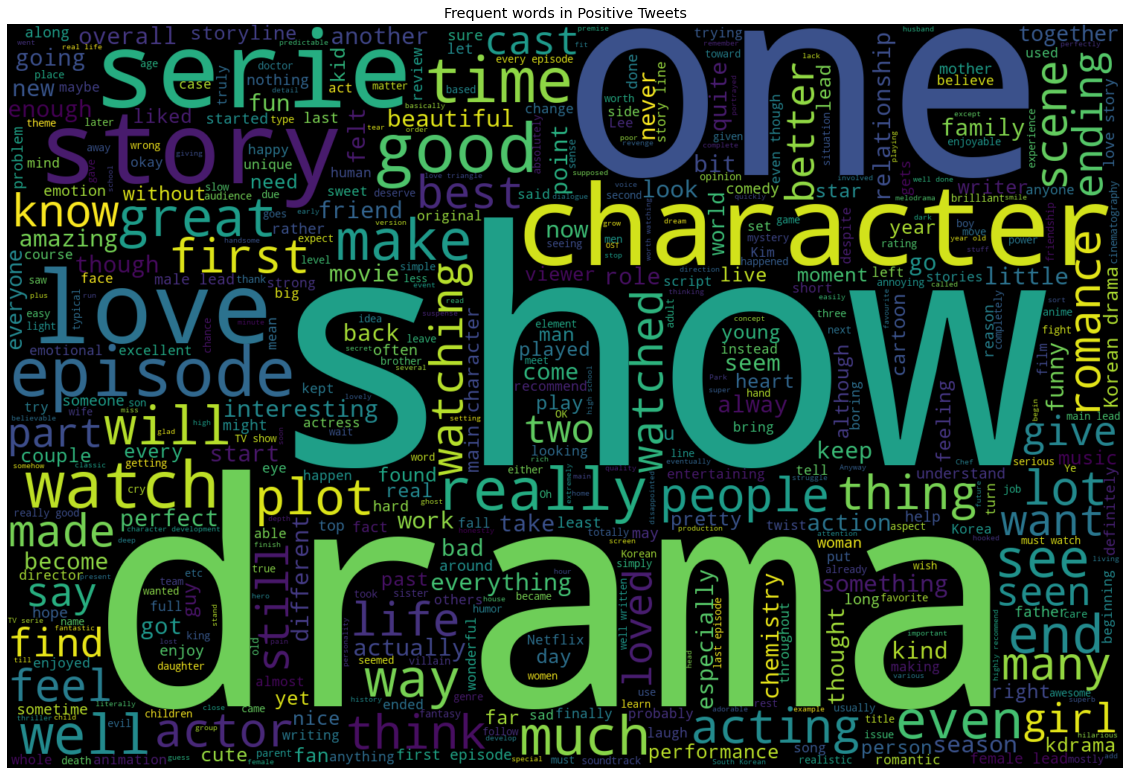

In [26]:
# viewing positive tweets in a wordcloud

Content = " ".join([word for word in positive_tweets['Content']])
plt.figure(figsize=(20,20),facecolor="None")
wordcloud = WordCloud(max_words=500,width=1500,height=1000).generate(Content)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Frequent words in Positive Tweets")
plt.show()

In [27]:
# viewing negative tweets

negative_tweets = newdataset[newdataset.Sentiment == "Negative"]
negative_tweets = negative_tweets.sort_values(['polarity'],ascending=False)
negative_tweets.head()

,Content,polarity,subjectivity,Sentiment
554,Episode 1 and last episode 16 were crap and ba...,-7.930164e-18,0.476190,Negative
818,This film informs viewers of the reality of th...,-1.513940e-17,0.490909,Negative
8219,I am a fan of Kdrama showcasing their food tha...,-3.172066e-17,0.592857,Negative
4600,"I struggled to watch the first 4 episodes, was...",-4.117260e-04,0.547661,Negative
6633,This is a very long series; while the story is...,-6.015038e-04,0.614962,Negative


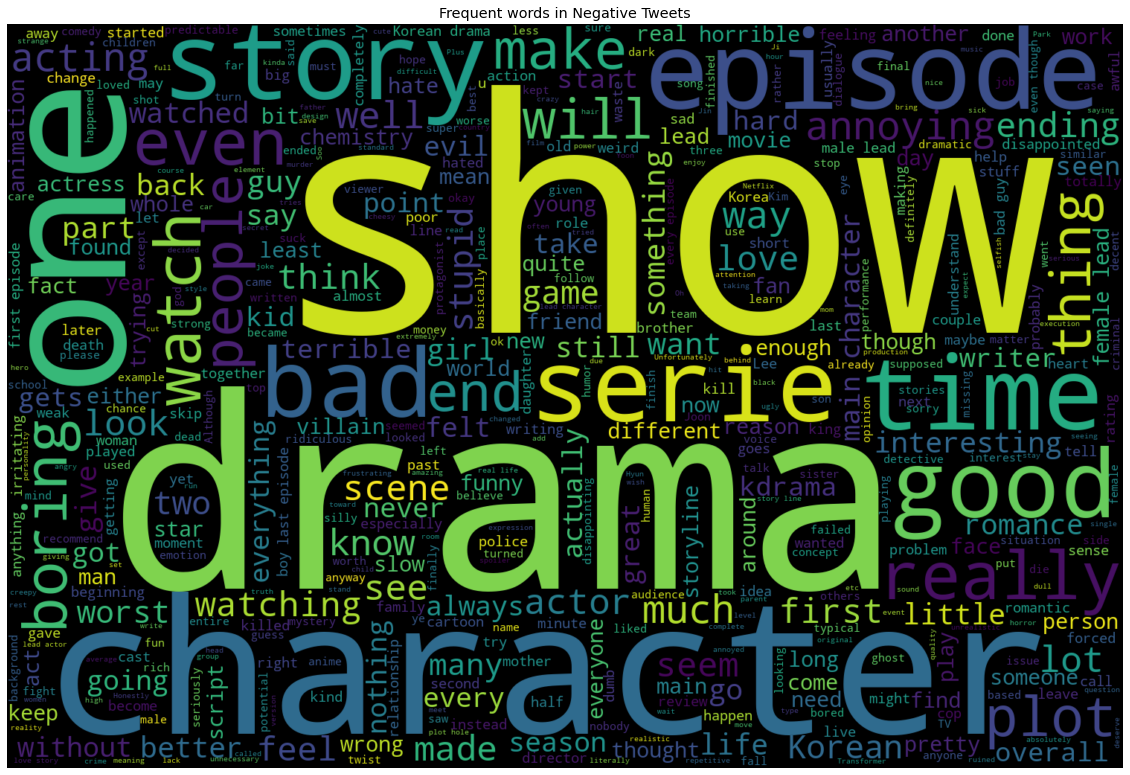

In [28]:
# viewing negative tweets in a wordcloud

Content = " ".join([word for word in negative_tweets['Content']])
plt.figure(figsize=(20,20),facecolor="None")
wordcloud = WordCloud(max_words=500,width=1500,height=1000).generate(Content)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Frequent words in Negative Tweets")
plt.show()

In [29]:
# viewing neutral tweets

neutral_tweets = newdataset[newdataset.Sentiment == "Neutral"]
neutral_tweets = neutral_tweets.sort_values(['polarity'],ascending=False)
neutral_tweets.head()

,Content,polarity,subjectivity,Sentiment
228,It was so freaking good.badly waiting for seas...,0.0,0.000000,Neutral
4985,IT needs some time until you connected to all ...,0.0,0.166667,Neutral
6331,BRO- I literally can't believe stitch cheated ...,0.0,0.000000,Neutral
6256,I will never forget the characters especially ...,0.0,1.000000,Neutral
5601,The director of this movie has a lack of sense...,0.0,0.500000,Neutral


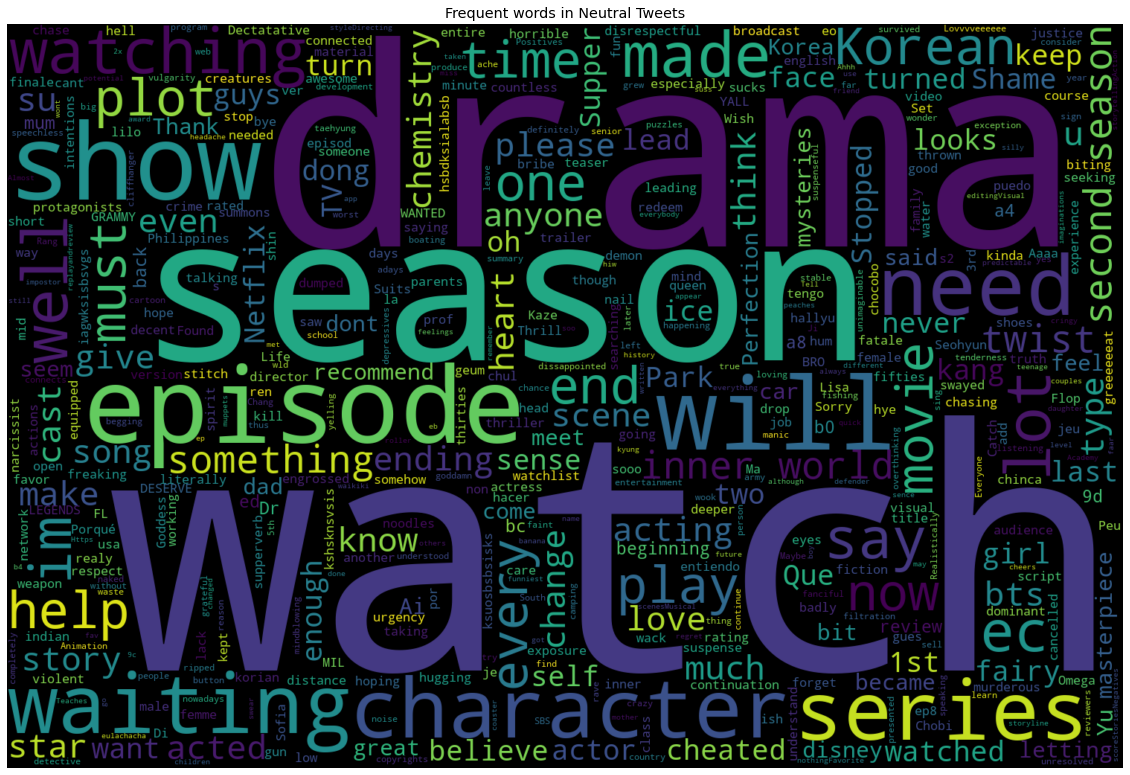

In [30]:
# viewing neutral tweets in a wordcloud

Content = " ".join([word for word in neutral_tweets['Content']])
plt.figure(figsize=(20,20),facecolor="None")
wordcloud = WordCloud(max_words=500,width=1500,height=1000).generate(Content)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Frequent words in Neutral Tweets")
plt.show()

In [31]:
# creating a  SVM Model

# for features in Support Vector Classification

vect = CountVectorizer(ngram_range=(1,2)).fit(newdataset['Content'])

In [32]:
# creating feature names

feature_names = vect.get_feature_names()
print("Number of features are :",len(feature_names))
print("First 20 Features are :",feature_names[:20])

Number of features are : 389204
First 20 Features are : ['00', '00 am', '000', '000 000', '000 acre', '000 balloons', '000 budget', '000 copies', '000 people', '000 reviews', '000 seasons', '000 times', '000 to', '000 won', '000 years', '0000000000000000', '001', '001 is', '001 supposedly', '001 the']


In [33]:
X = newdataset['Content']
Y = newdataset['Sentiment']
X = vect.transform(X)

In [34]:
x_train , x_test , y_train ,y_test = train_test_split(X,Y,test_size=0.1,random_state=20)

print("Size of x_train :",x_train.shape)
print("Size of y_train :",y_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of y_test :",y_test.shape)

Size of x_train : (7443, 389204)
Size of y_train : (7443,)
Size of x_test : (827, 389204)
Size of y_test : (827,)


In [45]:
# implementing SupportVectorMachine using define SupportVectorClassification function

from sklearn.svm import SVC
reg = SVC(kernel = 'linear', random_state = 0)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
y_acc  = accuracy_score(y_pred,y_test)
print("Test Accuracy : ",y_acc*100)

Test Accuracy :  89.48004836759371


In [46]:
# Printing Confusion Matrix

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[  0   0  78]
 [  0   0   9]
 [  0   0 740]]

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        78
     Neutral       0.00      0.00      0.00         9
    Positive       0.89      1.00      0.94       740

    accuracy                           0.89       827
   macro avg       0.30      0.33      0.31       827
weighted avg       0.80      0.89      0.85       827



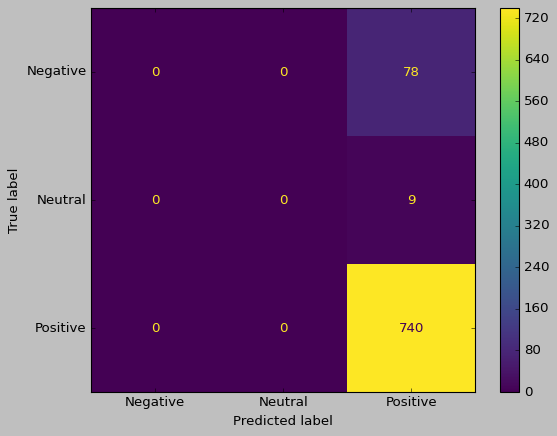

In [47]:
# Another form of Confusion Matrix

style.use('classic')
cm = confusion_matrix(y_test,y_pred,labels=reg.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=reg.classes_)
display.plot()